In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.stats import poisson
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
import json
from datetime import date, timedelta
np.random.seed(seed=0)
plt.rcParams['text.usetex'] = True

plt.rcParams.update({'font.size': 16})
# plt.rcParams["font.family"] = "Times New Roman"
# sns.set_style("whitegrid", rc={'font.family': 'Times New Roman', 'font.size': 16})
sns.set_style("whitegrid", rc={'font.size': 16})

from constants import LOCATION_CHOOSEN, LOCATION_CHOOSEN_2, OUTPUT_DIR, DATA_CACHE_DIR, OPTIMAL_VALUES_FILE, STRINGENCY_BASED_GDP

In [16]:
confirmed_cases_df = pd.read_csv("input/time_series_covid19_confirmed_global.csv")
confirmed_cases_location_df = confirmed_cases_df.loc[(confirmed_cases_df["Country/Region"] == LOCATION_CHOOSEN_2)]
confirmed_cases_location_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
confirmed_cases_location_df = confirmed_cases_location_df.T
confirmed_cases_location_df.columns = ['confirmed_cases']
confirmed_cases_location_df.index = pd.to_datetime(confirmed_cases_location_df.index)
display(confirmed_cases_location_df)

/tmp/ipykernel_8669/2182582379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases_location_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)


,confirmed_cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2023-03-05,44689327
2023-03-06,44689593
2023-03-07,44689919
2023-03-08,44690298


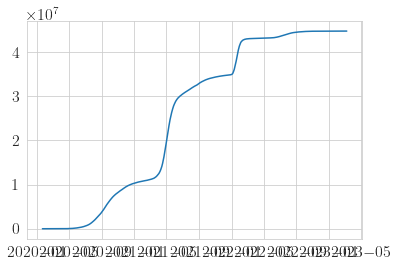

In [17]:
plt.plot(confirmed_cases_location_df['confirmed_cases'])

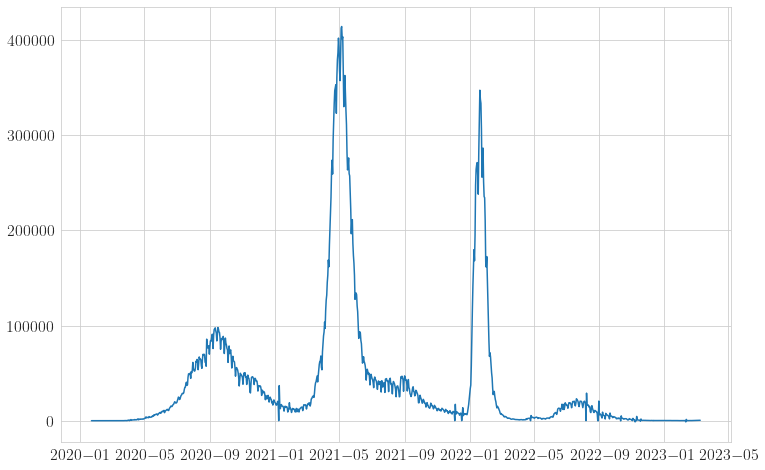

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(confirmed_cases_location_df.diff()['confirmed_cases'])

In [22]:
recovered_cases_df = pd.read_csv("input/time_series_covid19_recovered_global.csv")
recovered_cases_location_df = recovered_cases_df.loc[(recovered_cases_df["Country/Region"] == LOCATION_CHOOSEN_2)]
recovered_cases_location_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)
recovered_cases_location_df = recovered_cases_location_df.T
recovered_cases_location_df.columns = ['recovered_cases']
recovered_cases_location_df.index = pd.to_datetime(recovered_cases_location_df.index)
display(recovered_cases_location_df)

/tmp/ipykernel_8669/784344464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovered_cases_location_df.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1, inplace=True)


,recovered_cases
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2023-03-05,0
2023-03-06,0
2023-03-07,0
2023-03-08,0


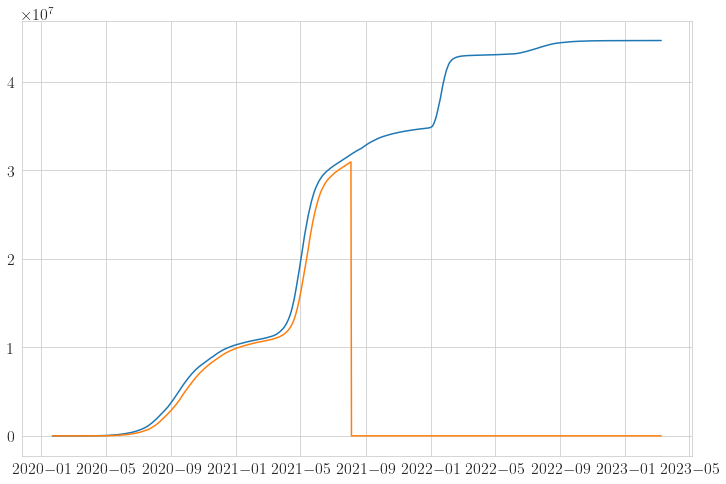

In [25]:
plt.figure(figsize=(12, 8))
plt.plot(confirmed_cases_location_df['confirmed_cases'])
plt.plot(recovered_cases_location_df['recovered_cases'])